The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table

Task is to make a mode that can consider the data provided and predict the Average Price

Attribute information

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Avocado project',parse_dates=['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16468, 14)

In [7]:
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Out of 16468 rows, 14951 are null value. let us remove this and we can proceed further

In [9]:
df_1=df.dropna()

In [10]:
df_1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df_1.shape

(1517, 14)

<AxesSubplot:title={'center':'Null value'}>

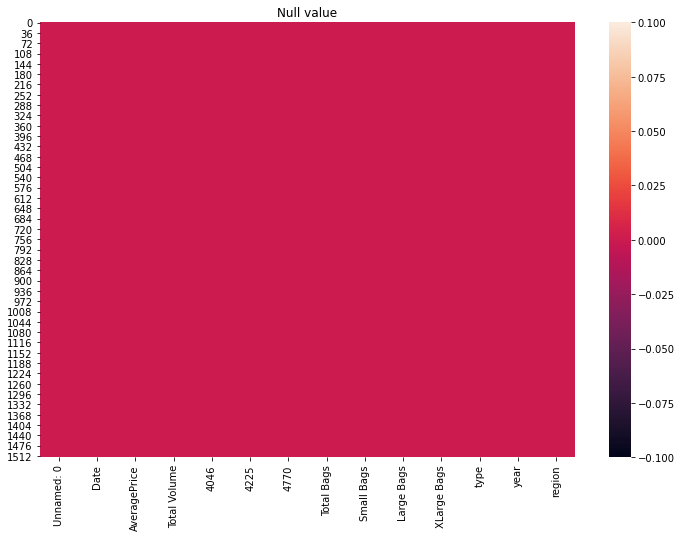

In [12]:
plt.figure(figsize=(12,8))
plt.title('Null value')
sns.heatmap(df_1.isnull())

In [13]:
df_1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:
1. There is no much gap in Average price, which means Data is normally distributed
2. we can find some difference between 75% and Max, which means there are Outliers present in the Data

In [14]:
df_1['Year']=pd.DatetimeIndex(df_1['Date']).year
df_1['Month']=pd.DatetimeIndex(df_1['Date']).month
df_1['day']=pd.DatetimeIndex(df_1['Date']).day

In [39]:
## Dropping the Unnecessary COlumns
df_2=df_1.drop(['Unnamed: 0','Date'],axis=1)

In [40]:
df_2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,2016,9,25


In [17]:
## I have dropped the columns Unnamed: 0 because it is just a counting number which has no significance in prediction

## I have droppend date column because we have extracted the Day, Month, seperatly from Date column.

<AxesSubplot:title={'center':'Correlation with AveragePrice'}>

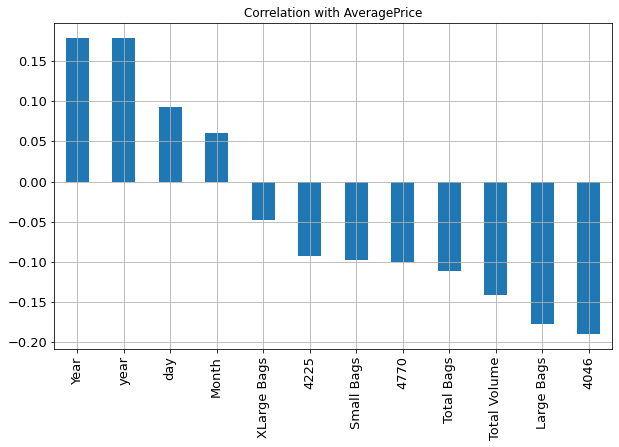

In [41]:
df_2.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot.bar(figsize=(10,6),grid=True,title='Correlation with AveragePrice',fontsize=13)

We can see that only few features are positivly correlated and most are negativly correlated with our Target Attribute AveragePrice.

# Let us have a look at Categorical Columns

In [42]:
df_2['type'].unique()

array(['conventional'], dtype=object)

There is only one unique Value in Type columns which is conventional.

In [43]:
df_2['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

We can see the list of Categories in Region, in which they have the details of Number of Avocado sold in each region
Highest number of Avocado has been sold in California and least number of avocado in LosAngeles

# Data Visualization

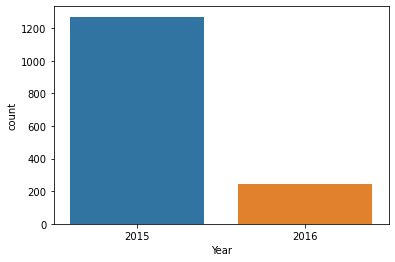

2015    1270
2016     247
Name: Year, dtype: int64


In [44]:
sns.countplot(df_2['Year'])
plt.show()
print(df_2['Year'].value_counts())

Avocado sales was more in 2015 as compared to 2016.

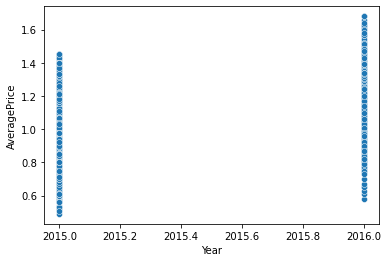

In [45]:
sns.scatterplot(x=df_2['Year'],y=df_2['AveragePrice'])
plt.show()

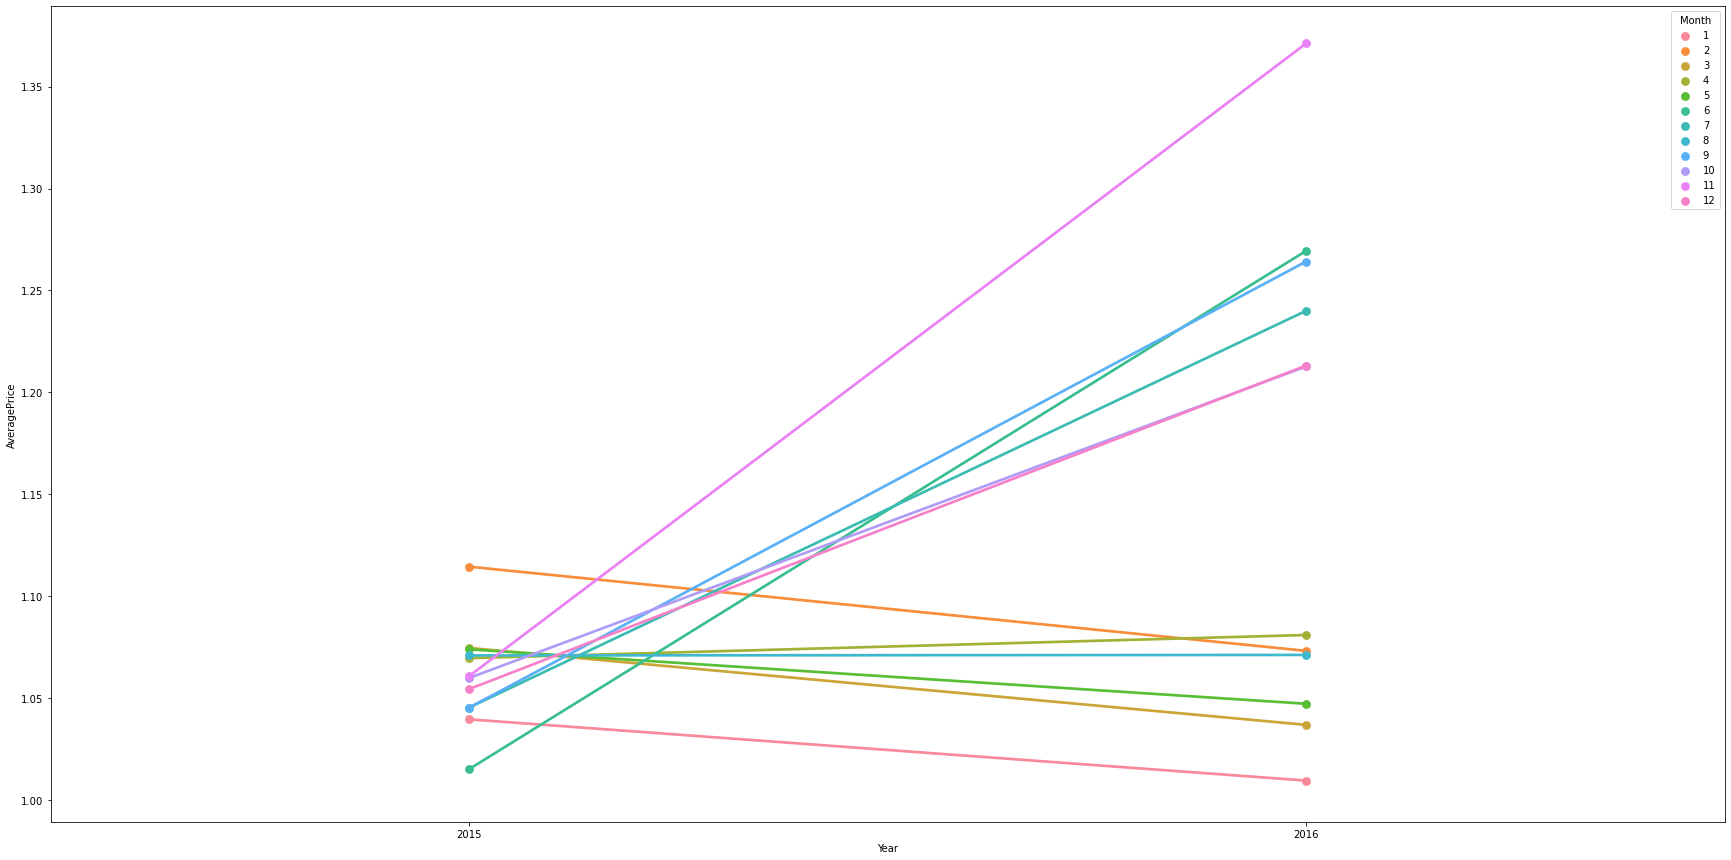

In [46]:
plt.figure(figsize=(30, 15))
sns.pointplot(x = 'Year', y = 'AveragePrice', data = df_2, hue = 'Month', ci = False)
plt.show()

Observations

Average price increased in April,june,july,August,september,Oct,Dec 2016 compared to 2015.

Average price decreased in jan,Feb,Mar,May,Nov 2016 as compared to 2015

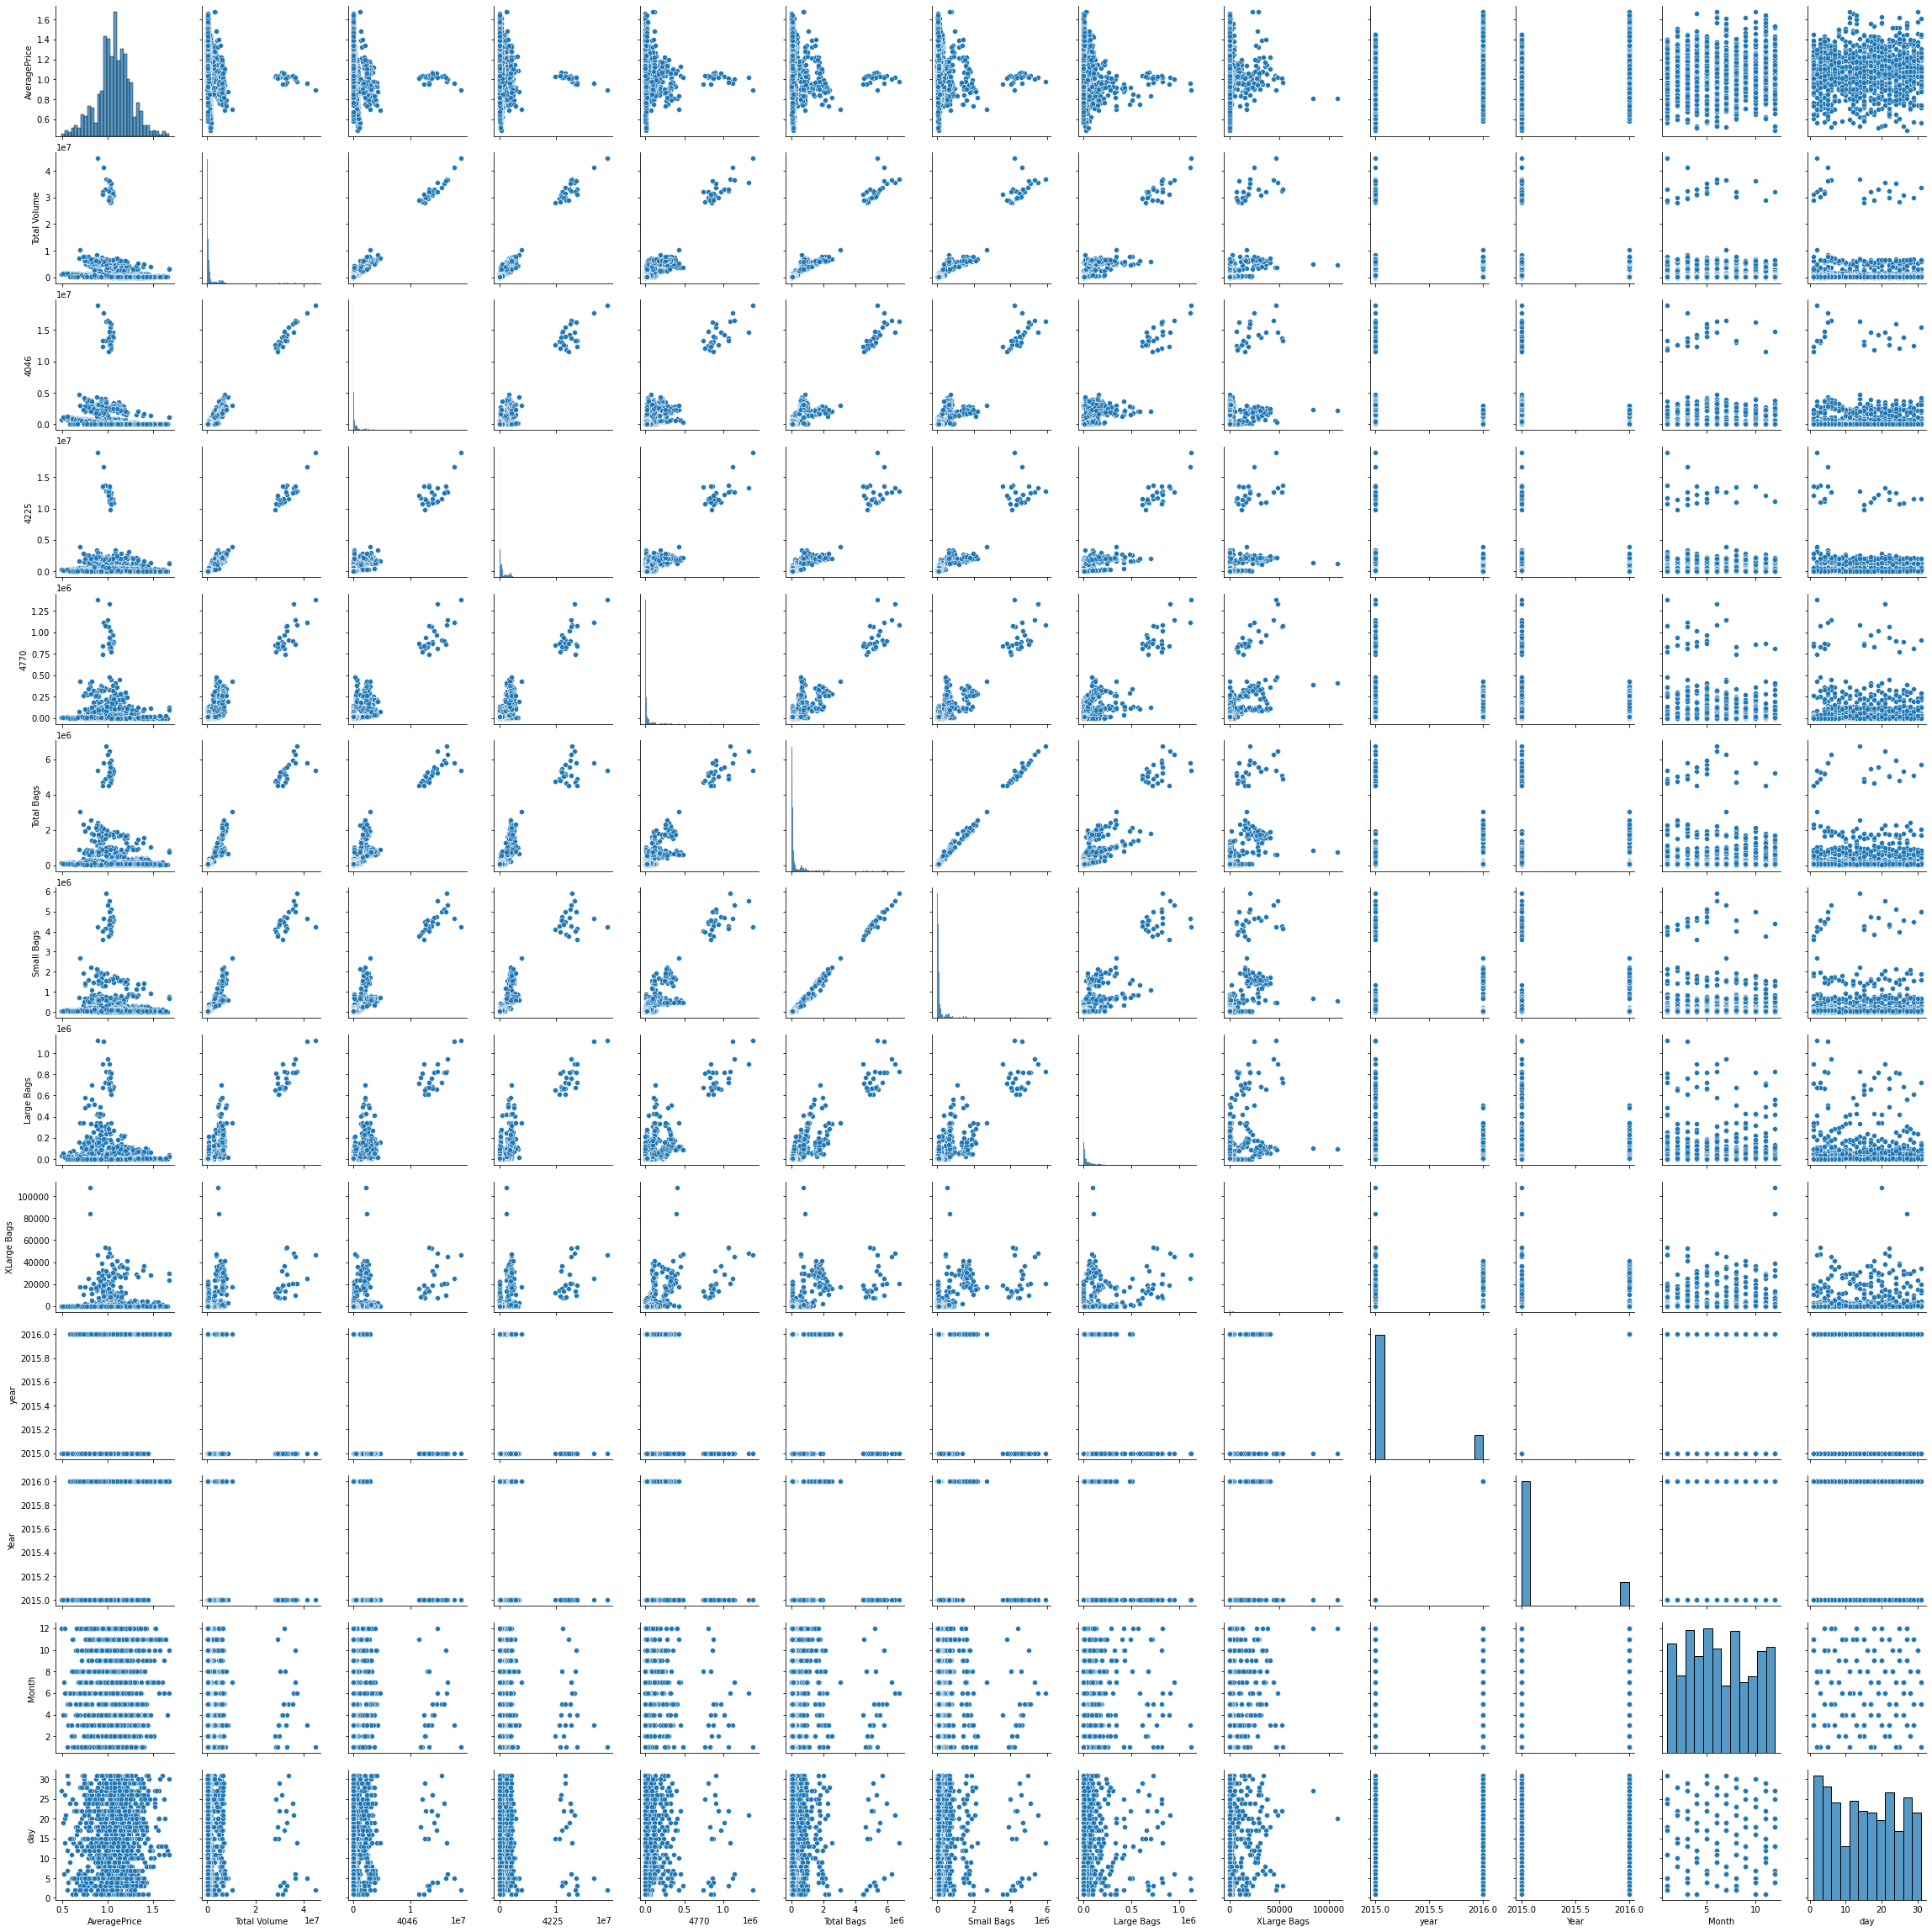

In [47]:
sns.pairplot(df_2)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" shows the positive corelation where as "\" shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.


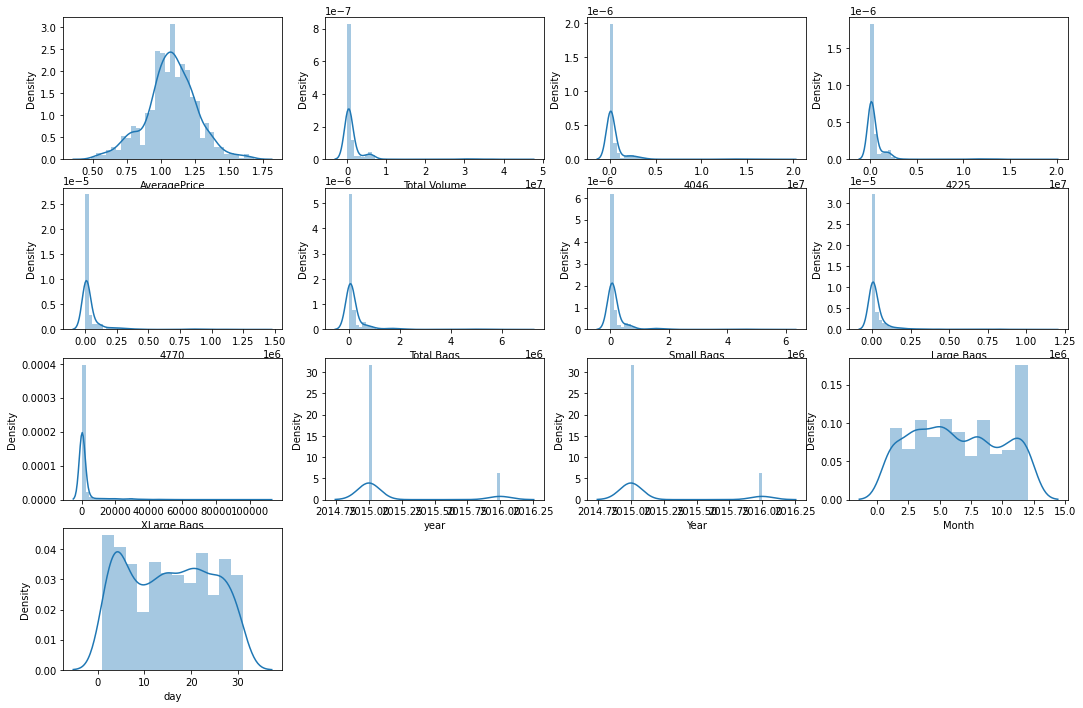

In [48]:
di=df_2.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

1-We can see that Our target attribute Average Price is Normally Distributed.

2- Total Volume,Total bags,small bags,Large Bags and Xlarge Bags are Right Skewed.

3-All the right skewed distributed data has majority the values near to zero.

# Outliers 

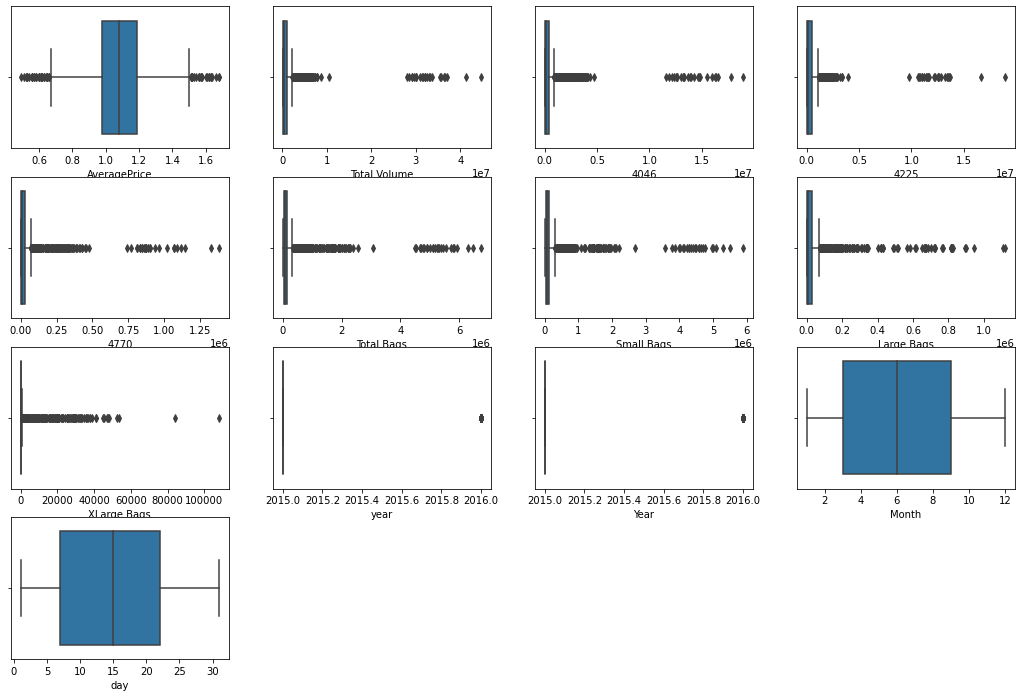

In [49]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

From the above we can note that there are many Outliers present in the Data

# Removing Outliers

We can remove the Outliers through IQR Method

In [50]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

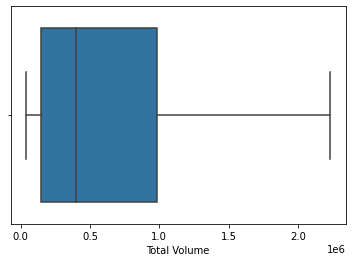

In [51]:
replace_outlier(df_2,'Total Volume')

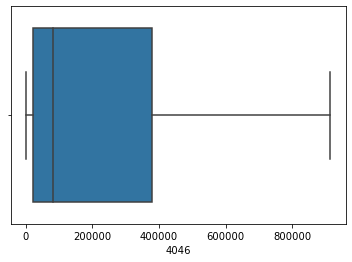

In [52]:
replace_outlier(df_2,'4046')

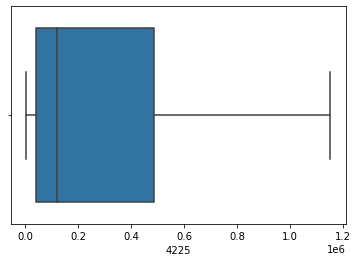

In [44]:
replace_outlier(df_2,'4225')

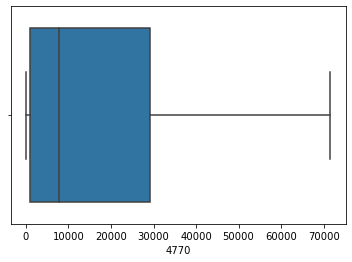

In [45]:
replace_outlier(df_2,'4770')

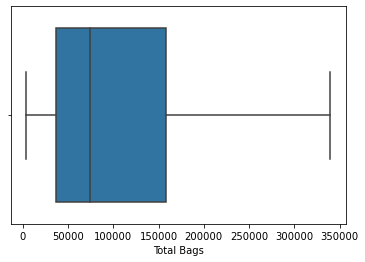

In [47]:
replace_outlier(df_2,'Total Bags')

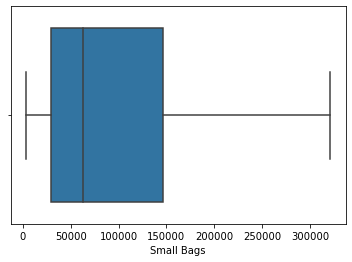

In [48]:
replace_outlier(df_2,'Small Bags')

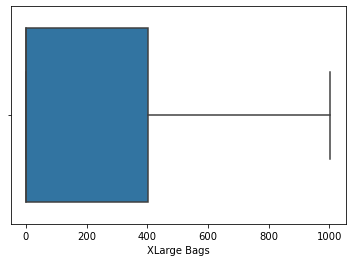

In [49]:
replace_outlier(df_2,'XLarge Bags')

In [53]:
df_2.shape

(1517, 15)

Data After Removing Outliers

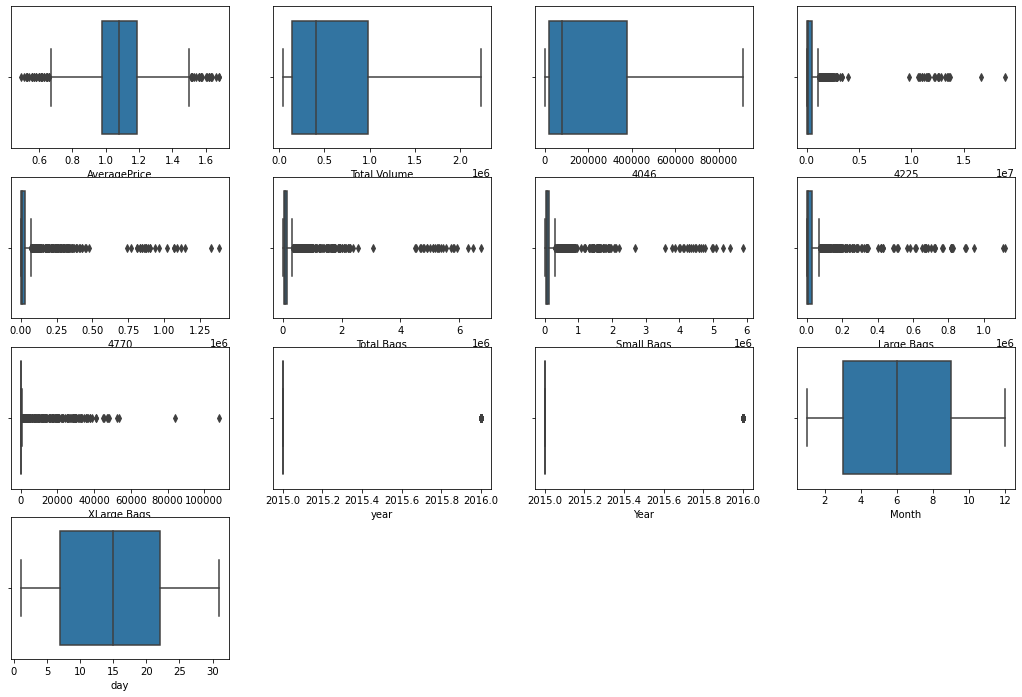

In [54]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=14:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

# Skewness

In [55]:
df_2.skew()

AveragePrice   -0.109444
Total Volume    1.176935
4046            1.212500
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Year            1.828332
Month           0.101439
day             0.041303
dtype: float64

In [56]:
#removing Skewness using log1p
for i in di:
    if df_2[i].skew()>0.55:
        df_2[i]=np.log1p(df_2[i])

In [55]:
df_2.skew()

AveragePrice   -0.109444
Total Volume    0.001866
4046           -0.549613
4225           -0.202132
4770           -0.686219
Total Bags     -0.244284
Small Bags     -0.100335
Large Bags     -0.912766
XLarge Bags     0.528704
year            1.828332
dtype: float64

from the above we can see the skewness has been removed

In [56]:
df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany


# Encoding of Categorical Attribute

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_2['region']=le.fit_transform(df_2['region'])

In [58]:
df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,0,7.608871,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,0,7.608871,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,0,7.608871,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,0,7.608871,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,0,7.608871,11,29


# Splitting the Data

In [59]:
x = df_2.drop(['AveragePrice','type'],axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Year,Month,day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0,7.608871,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0,7.608871,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0,7.608871,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0,7.608871,6,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0,7.608871,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7,7.609367,10,16
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7,7.609367,9,10
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7,7.609367,2,10
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7,7.609367,9,25


In [60]:
y=df_2['AveragePrice']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

# Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Year,Month,day
0,-1.548337,-1.955648,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,-0.441008,-1.314338,-0.441008,1.624154,1.310530
1,-1.683771,-2.159638,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,-0.441008,-1.314338,-0.441008,1.624154,0.529537
2,-1.023750,-2.081733,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,-0.441008,-1.314338,-0.441008,1.624154,-0.251456
3,-1.370508,-1.913953,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-0.441008,-1.314338,-0.441008,-0.104453,-0.363027
4,-1.746115,-2.001360,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,-0.441008,-1.314338,-0.441008,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.611872,-0.049376,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079,2.267532,-0.880286,2.267532,1.047952,0.083255
1513,-0.670663,-0.183987,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775,2.267532,-0.880286,2.267532,0.759850,-0.586168
1514,-0.669819,-0.151804,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891,2.267532,-0.880286,2.267532,-1.256858,-0.586168
1515,-0.619633,-0.078458,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775,2.267532,-0.880286,2.267532,0.759850,1.087389


# Feature Importance

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [63]:
print(extra.feature_importances_)

[0.10603313 0.33019237 0.08756172 0.0724674  0.07623313 0.07075536
 0.04501108 0.05081222 0.02641592 0.07299566 0.02184598 0.02219558
 0.01748046]


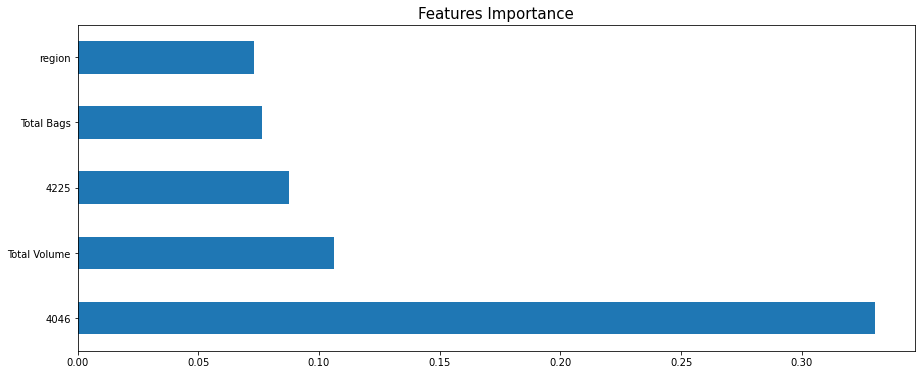

In [72]:
plt.figure(figsize=(15,6))
plt.title('Features Importance',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

In [73]:
df_2.shape

(1517, 15)

# PCA

In [74]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=12)

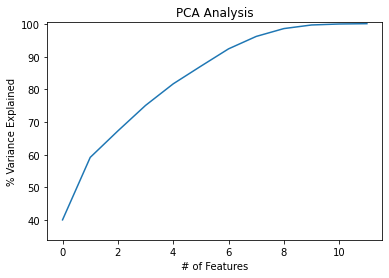

In [75]:
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [76]:
pca=PCA(n_components=9)
x=pca.fit_transform(x)
x.shape

(1517, 9)

# Model

In [77]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [78]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 43 is 0.37714431371400137


cross validation score -34.16093708758273


Standard Deviation 68.29035783595417


Training accuracy 0.3025681876202806


Test Accuracy 0.3717841932149206


MAE 0.11587186169712034


MSE 0.02089312361799654


RMSE 0.1445445385270455




43

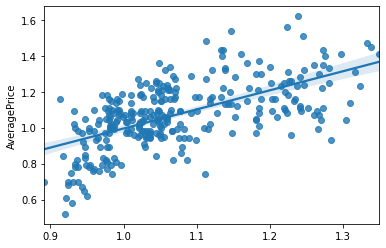

In [79]:
#LINERAR rEGRESSION
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 43 is 0.3770455800730511


cross validation score -22.163765222179904


Standard Deviation 44.297670506916184


Training accuracy 0.3025679124516164


Test Accuracy 0.37171837985332845


MAE 0.11587276955231074


MSE 0.020895312430638007


RMSE 0.14455210974122104




43

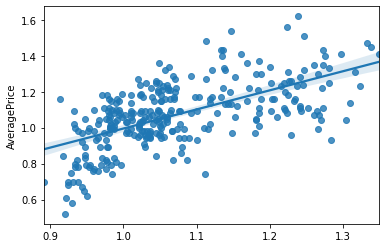

In [80]:
## Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 74 is 0.5789978958112738


cross validation score -0.6478607903471435


Standard Deviation 0.6491810723918973


Training accuracy 1.0


Test Accuracy 0.4139101046965118


MAE 0.10046052631578947


MSE 0.019492105263157894


RMSE 0.13961412988361133




74

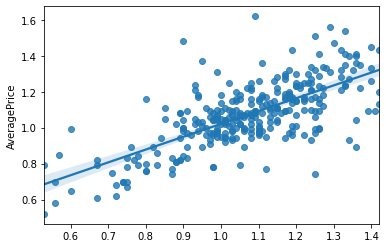

In [81]:
# Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 59 is 0.7172462925888279


cross validation score 0.20005396187625912


Standard Deviation 0.08048511137220289


Training accuracy 0.786576892982967


Test Accuracy 0.691126985356622


MAE 0.07854605263157895


MSE 0.010272460526315787


RMSE 0.10135314758958296




59

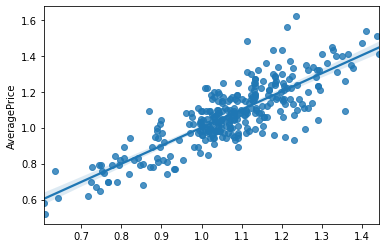

In [82]:
## KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 42 is 0.7362513490197995


cross validation score 0.33145456493656217


Standard Deviation 0.128583247407224


Training accuracy 0.7754488666848746


Test Accuracy 0.6544233587925539


MAE 0.08475424597628295


MSE 0.011493145199877661


RMSE 0.10720608751315226




42

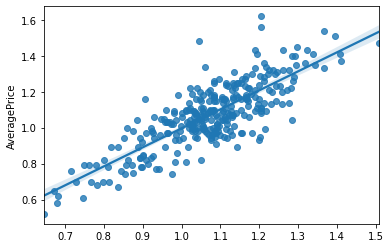

In [83]:
##SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 89 is 0.7606618610880497


cross validation score 0.13955244185849533


Standard Deviation 0.1904284731375327


Training accuracy 0.9553978799016835


Test Accuracy 0.6874000961295729


MAE 0.07503289473684206


MSE 0.010396408947368417


RMSE 0.1019627821676538




89

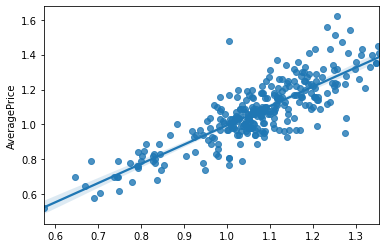

In [84]:
## random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 47 is 0.5732842418091967


cross validation score 0.16429700478507364


Standard Deviation 0.08836543355779711


Training accuracy 0.6040871296422515


Test Accuracy 0.4932000187191815


MAE 0.10560017741400367


MSE 0.016855091107443237


RMSE 0.12982715858957725




47

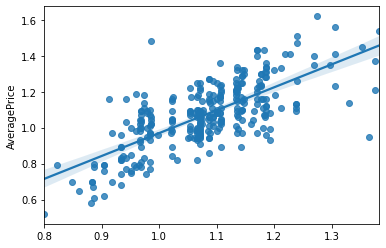

In [85]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,x,y)

max r2 score corresponding to 67 is 0.6743157630810301


cross validation score 0.08490074529267391


Standard Deviation 0.2782665010595577


Training accuracy 0.784378536928629


Test Accuracy 0.5727359341568681


MAE 0.09311411685471926


MSE 0.014209895467088058


RMSE 0.11920526610468204




67

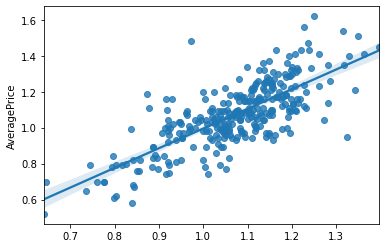

In [86]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

We can see from above all the Models that the K-Nearest Neighbours gives us a Maximun R2 score. 


# Hyperparameter Tuning

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92,test_size=.20)
param={'n_neighbors':range(5,21),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'n_jobs':[-1]}
glf=GridSearchCV(knn,param,scoring='r2')
glf.fit(x_train,y_train)
glf.best_params_

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}

In [88]:
knn_r=KNeighborsRegressor(algorithm='auto',n_jobs=-1,n_neighbors=5,weights='distance')
knn_r.fit(x_train,y_train)
pred=knn_r.predict(x_test)
print('Training accuracy',knn_r.score(x_train,y_train))
print('Testing Accuracy',knn_r.score(x_test,y_test))
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 Score',r2_score(pred,y_test))

Training accuracy 1.0
Testing Accuracy 0.7133165990860444
MAE 0.07804002230546152


MSE 0.010166498937361771


RMSE 0.10082905800096405


R2 Score 0.5503898012545392


# Model Saving

In [89]:
import joblib
joblib.dump(knn_r,'Avocadoknn_r.pkl')

['Avocadoknn_r.pkl']

In [90]:
loaded_model=joblib.load('Avocadoknn_r.pkl')
prediction=loaded_model.predict(x_test)